In [13]:
import os, sys
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from scipy import spatial

path     = os.getcwd()
pathpar  = path+'/opt_par'
pathbps  = path+'/opt_det-seqs'
pathdff  = path+'/opt_pars-diff'

# --------------------------------------------------------------------------------
if 'Young_Research' in path:
    ffpath   = "C:\\Users\\Young_Research\\Documents\\Rutgers\\Research\\2020_PHY_MSc\\data\\forcefields"
    inpath   = "C:\\Users\\Young_Research\\Documents\\Rutgers\\Research\\2020_PHY_MSc\\data\\initial_conditions"
else:
    ffpath   = "/home/rty10/Documents/Experiments/Optimizations/Opt_ForceFields"
    inpath   = ""
# --------------------------------------------------------------------------------
    
Ncirc = 150
ematrix_dict = {0:'tilt', 1:'roll', 2:'twist', 3:'shift', 4:'slide', 5:'rise'}
incons        = ['pc140','pc143','pc145','pc150','pc155','or150']

inseqs        = ['col05','col06','col07','col08','col09']
inseqs1       = ['$A_1G_1$','$A_2G_2$','$A_3G_3$','$A_4G_4$','$A_5G_5$']
inseqs_labs   = {inseqs[i]:inseqs1[i] for i in range(0, len(inseqs))}

forcefields   = ['ideal']

colors_dict = {#'pc14':'#00ba00', 'pc15':'#FFCC00','or15':'#1e90ff',
               'col05':'#00A5CF','col06':'#FB3640','col07':'#44AF69','col08':'#F0A202','col09':'#004385',
               'kabsch':'#4682B4','ideal':'#B4464B','olson':'#B4AF46'}

In [2]:
df = pd.read_csv(pathdff+'/'+inseqs[4]+'_'+incons[0]+'_ideal_bps-diffdata.txt')

df.head()

,dimer,excess_tilt,excess_roll,excess_bend,excess_twist,delta_tilt,delta_roll,delta_bend,delta_twist,shift_tilt,shift_roll,shift_bend,shift_twist
0,AA,1.34537,1.98755,2.400078,-0.68467,0.01537,-0.01245,-0.001775,-0.00897,1.345368,1.987549,0.000078,1.026667e-05
1,AA,2.22047,0.91086,2.400032,-0.68460,0.01047,-0.01914,0.002325,-0.00890,2.220468,0.910859,0.000032,8.026667e-05
2,AA,2.35359,-0.47012,2.400083,-0.68469,-0.00641,-0.02012,-0.002436,-0.00899,2.353588,-0.470121,0.000083,-9.733333e-06
3,AA,1.70009,-1.69400,2.399988,-0.68462,-0.00991,-0.01400,0.002802,-0.00892,1.700088,-1.694001,-0.000012,6.026667e-05
4,AG,0.47862,-2.35176,2.399969,-0.68468,-0.02138,-0.00176,-0.002634,-0.00898,0.478618,-2.351761,-0.000031,2.666667e-07


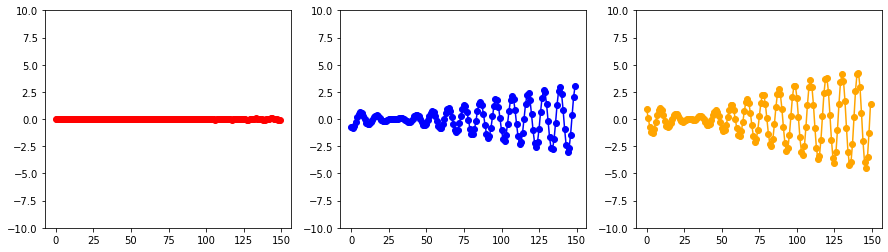

-------------------------


<Figure size 432x288 with 0 Axes>

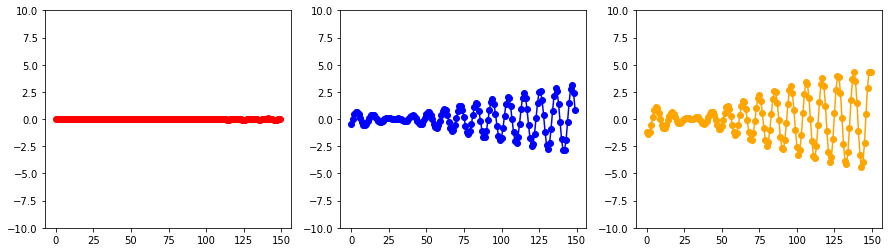

-------------------------


<Figure size 432x288 with 0 Axes>

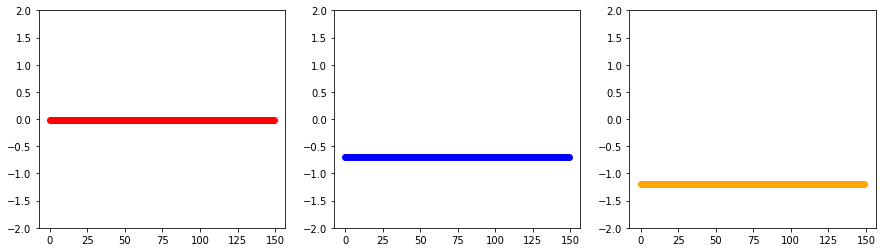

<Figure size 432x288 with 0 Axes>

In [3]:
for ff in ['ideal']:
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    datadf = pd.read_csv(pathdff+'/col09_'+incons[0]+'_'+ff+'_bps-diffdata.txt')
    datadf.reset_index().plot.line(y='delta_tilt', ylim=(-10,10), marker='o', color='red', legend=False, ax=ax1)
    del datadf
    
    datadf = pd.read_csv(pathdff+'/col09_'+incons[1]+'_'+ff+'_bps-diffdata.txt')
    datadf.reset_index().plot.line(y='delta_tilt', ylim=(-10,10), marker='o', color='blue', legend=False, ax=ax2)
    del datadf
    
    datadf = pd.read_csv(pathdff+'/col09_'+incons[2]+'_'+ff+'_bps-diffdata.txt')
    datadf.reset_index().plot.line(y='delta_tilt', ylim=(-10,10), marker='o', color='orange', legend=False, ax=ax3)
    del datadf
        
    #ax1.xaxis.set_major_locator(MultipleLocator(10))
    #plt.grid(linestyle=':')
    plt.show()
    plt.clf()
print('-'*25)
for ff in ['ideal']:
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    datadf = pd.read_csv(pathdff+'/col09_'+incons[0]+'_'+ff+'_bps-diffdata.txt')
    datadf.reset_index().plot.line(y='delta_roll', ylim=(-10,10), marker='o', color='red', legend=False, ax=ax1)
    del datadf
    
    datadf = pd.read_csv(pathdff+'/col09_'+incons[1]+'_'+ff+'_bps-diffdata.txt')
    datadf.reset_index().plot.line(y='delta_roll', ylim=(-10,10), marker='o', color='blue', legend=False, ax=ax2)
    del datadf
    
    datadf = pd.read_csv(pathdff+'/col09_'+incons[2]+'_'+ff+'_bps-diffdata.txt')
    datadf.reset_index().plot.line(y='delta_roll', ylim=(-10,10), marker='o', color='orange', legend=False, ax=ax3)
    del datadf
        
    #ax1.xaxis.set_major_locator(MultipleLocator(10))
    #plt.grid(linestyle=':')
    plt.show()
    plt.clf()
print('-'*25)
for ff in ['ideal']:
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    datadf = pd.read_csv(pathdff+'/col09_'+incons[0]+'_'+ff+'_bps-diffdata.txt')
    datadf.reset_index().plot.line(y='delta_twist', ylim=(-2,2), marker='o', color='red', legend=False, ax=ax1)
    del datadf
    
    datadf = pd.read_csv(pathdff+'/col09_'+incons[1]+'_'+ff+'_bps-diffdata.txt')
    datadf.reset_index().plot.line(y='delta_twist', ylim=(-2,2), marker='o', color='blue', legend=False, ax=ax2)
    del datadf
    
    datadf = pd.read_csv(pathdff+'/col09_'+incons[2]+'_'+ff+'_bps-diffdata.txt')
    datadf.reset_index().plot.line(y='delta_twist', ylim=(-2,2), marker='o', color='orange', legend=False, ax=ax3)
    del datadf
        
    #ax1.xaxis.set_major_locator(MultipleLocator(10))
    #plt.grid(linestyle=':')
    plt.show()
    plt.clf()

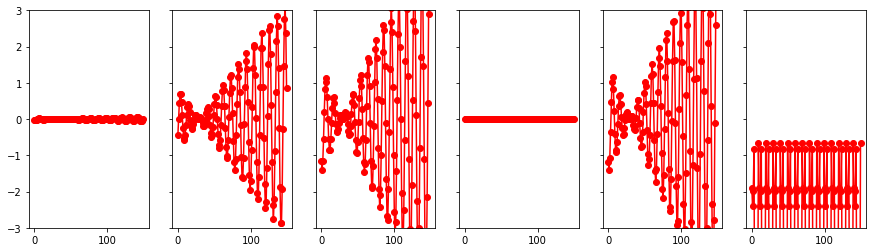

<Figure size 432x288 with 0 Axes>

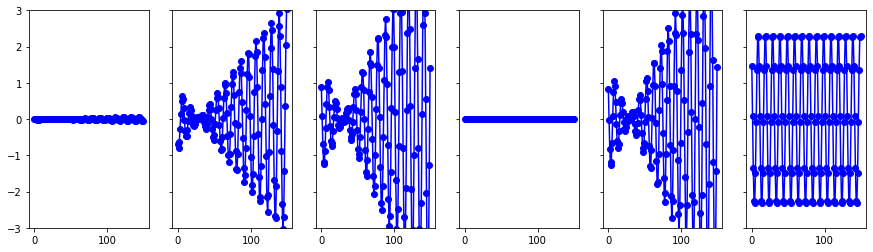

<Figure size 432x288 with 0 Axes>

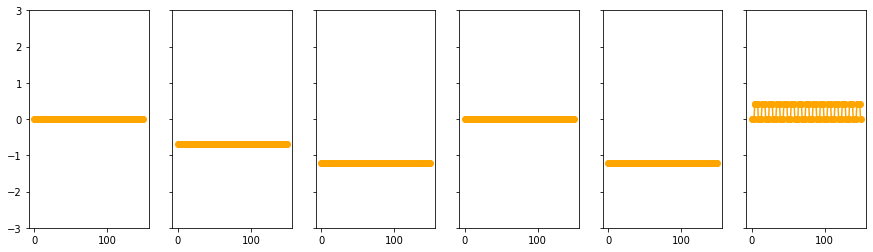

<Figure size 432x288 with 0 Axes>

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=len(incons), figsize=(15, 4), sharey=True)
for i in range(len(incons)):
    datadf = pd.read_csv(pathdff+'/col05_'+incons[i]+'_ideal_bps-diffdata.txt')
    datadf.reset_index().plot.line(y='delta_roll', ylim=(-10,10), marker='o', color='red', legend=False, ax=axes[i])
    del datadf
plt.ylim(-3,3)
plt.show()
plt.clf()

fig, axes = plt.subplots(nrows=1, ncols=len(incons), figsize=(15, 4), sharey=True)
for i in range(len(incons)):
    datadf = pd.read_csv(pathdff+'/col05_'+incons[i]+'_ideal_bps-diffdata.txt')
    datadf.reset_index().plot.line(y='delta_tilt', ylim=(-10,10), marker='o', color='blue', legend=False, ax=axes[i])
    del datadf
plt.ylim(-3,3)
plt.show()
plt.clf()

fig, axes = plt.subplots(nrows=1, ncols=len(incons), figsize=(15, 4), sharey=True)
for i in range(len(incons)):
    datadf = pd.read_csv(pathdff+'/col05_'+incons[i]+'_ideal_bps-diffdata.txt')
    datadf.reset_index().plot.line(y='delta_twist', ylim=(-10,10), marker='o', color='orange', legend=False, ax=axes[i])
    del datadf
plt.ylim(-3,3)
plt.show()
plt.clf()

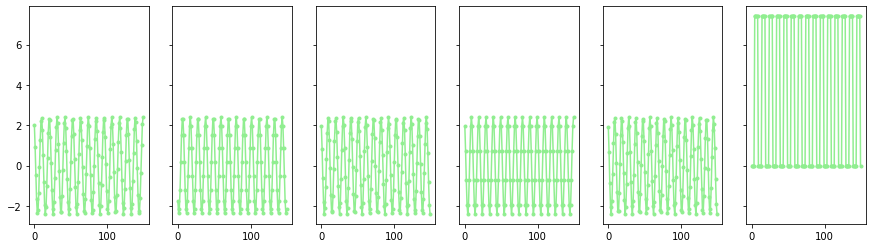

<Figure size 432x288 with 0 Axes>

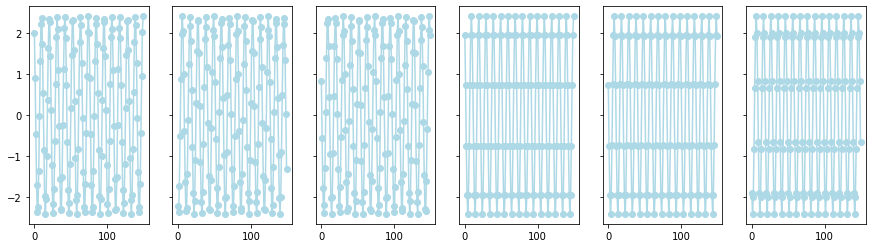

<Figure size 432x288 with 0 Axes>

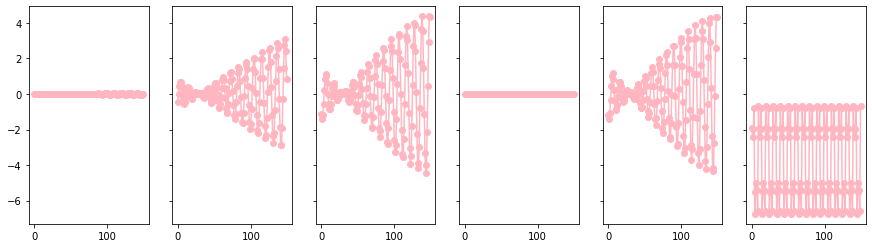

<Figure size 432x288 with 0 Axes>

In [26]:
parameter = 'Roll'
deltapar  = 'delta_roll'
initial_color = 'lightgreen'
optimized_color = 'lightblue'
delta_color   = 'lightpink'

fig, axes = plt.subplots(nrows=1, ncols=len(incons), figsize=(15, 4), sharey=True)
for i in range(len(incons)):
    datadf = pd.read_csv(inpath+'/jul2020/in_circ_par/col09_'+incons[i]+'.par', sep='\s+', skiprows=2)
    datadf = datadf.drop([0], axis=0)
    datadf.reset_index().plot.line(y=parameter, marker='.', color=initial_color, legend=False, ax=axes[i])
    del datadf
plt.show()
plt.clf()

fig, axes = plt.subplots(nrows=1, ncols=len(incons), figsize=(15, 4), sharey=True)
for i in range(len(incons)):
    datadf = pd.read_csv(pathpar+'/col09_'+incons[i]+'_ideal.par', sep='\s+', skiprows=2)
    datadf = datadf.drop([0], axis=0)
    datadf.reset_index().plot.line(y=parameter, marker='o', color=optimized_color, legend=False, ax=axes[i])
    del datadf
plt.show()
plt.clf()

fig, axes = plt.subplots(nrows=1, ncols=len(incons), figsize=(15, 4), sharey=True)
for i in range(len(incons)):
    datadf = pd.read_csv(pathdff+'/col09_'+incons[i]+'_ideal_bps-diffdata.txt')
    datadf.reset_index().plot.line(y=deltapar, marker='o', color=delta_color, legend=False, ax=axes[i])
    del datadf
plt.show()
plt.clf()

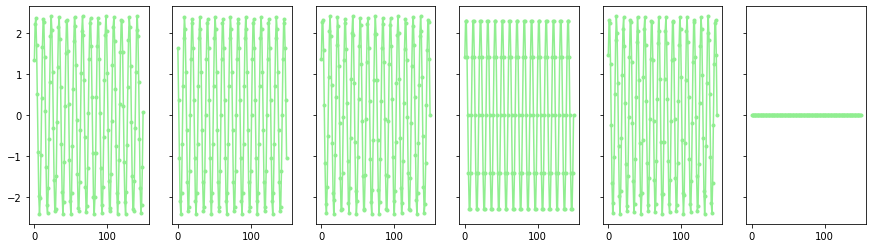

<Figure size 432x288 with 0 Axes>

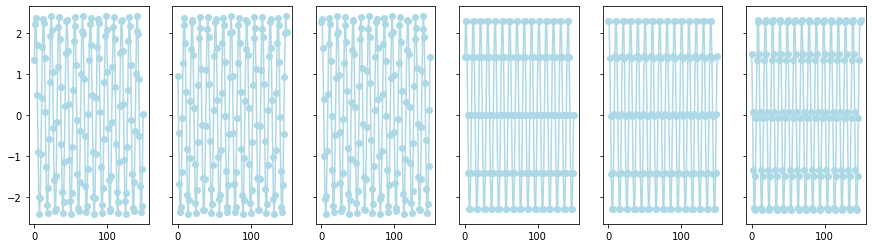

<Figure size 432x288 with 0 Axes>

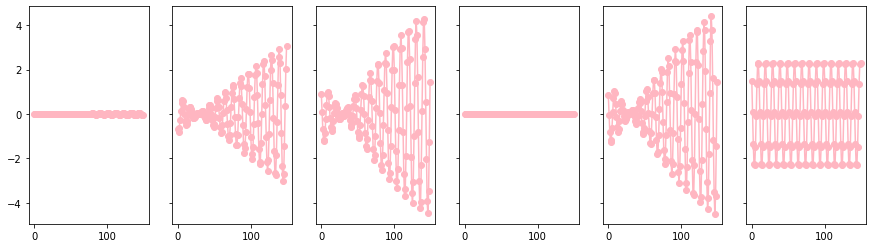

<Figure size 432x288 with 0 Axes>

In [25]:
parameter = 'Tilt'
deltapar  = 'delta_tilt'
initial_color = 'lightgreen'
optimized_color = 'lightblue'
delta_color   = 'lightpink'

fig, axes = plt.subplots(nrows=1, ncols=len(incons), figsize=(15, 4), sharey=True)
for i in range(len(incons)):
    datadf = pd.read_csv(inpath+'/jul2020/in_circ_par/col09_'+incons[i]+'.par', sep='\s+', skiprows=2)
    datadf = datadf.drop([0], axis=0)
    datadf.reset_index().plot.line(y=parameter, marker='.', color=initial_color, legend=False, ax=axes[i])
    del datadf
plt.show()
plt.clf()

fig, axes = plt.subplots(nrows=1, ncols=len(incons), figsize=(15, 4), sharey=True)
for i in range(len(incons)):
    datadf = pd.read_csv(pathpar+'/col09_'+incons[i]+'_ideal.par', sep='\s+', skiprows=2)
    datadf = datadf.drop([0], axis=0)
    datadf.reset_index().plot.line(y=parameter, marker='o', color=optimized_color, legend=False, ax=axes[i])
    del datadf
plt.show()
plt.clf()

fig, axes = plt.subplots(nrows=1, ncols=len(incons), figsize=(15, 4), sharey=True)
for i in range(len(incons)):
    datadf = pd.read_csv(pathdff+'/col09_'+incons[i]+'_ideal_bps-diffdata.txt')
    datadf.reset_index().plot.line(y=deltapar, marker='o', color=delta_color, legend=False, ax=axes[i])
    del datadf
plt.show()
plt.clf()

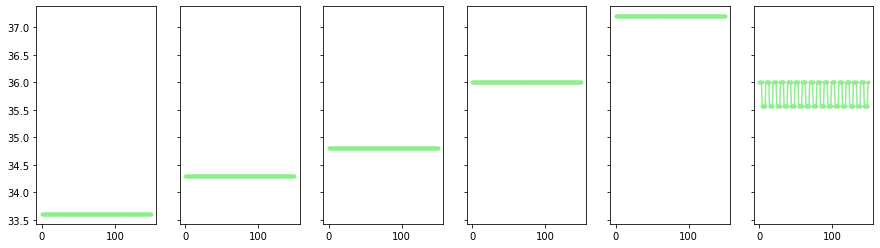

<Figure size 432x288 with 0 Axes>

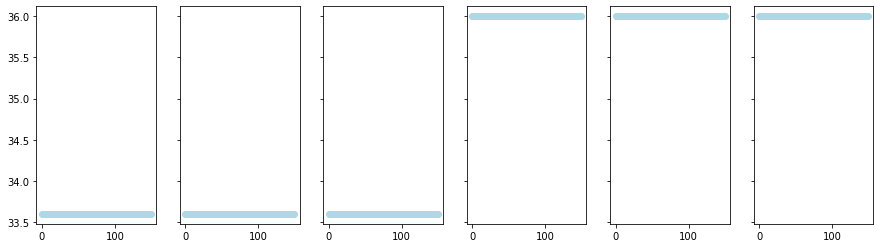

<Figure size 432x288 with 0 Axes>

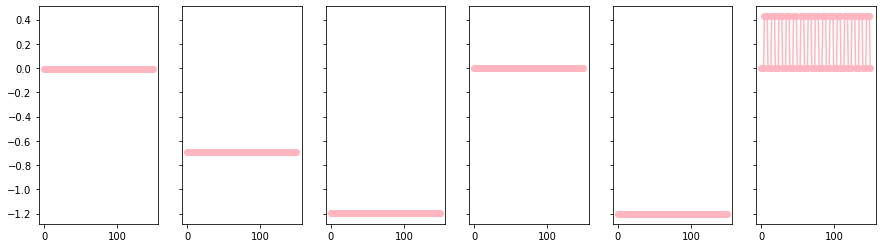

<Figure size 432x288 with 0 Axes>

In [24]:
parameter = 'Twist'
deltapar  = 'delta_twist'
initial_color = 'lightgreen'
optimized_color = 'lightblue'
delta_color   = 'lightpink'

fig, axes = plt.subplots(nrows=1, ncols=len(incons), figsize=(15, 4), sharey=True)
for i in range(len(incons)):
    datadf = pd.read_csv(inpath+'/jul2020/in_circ_par/col09_'+incons[i]+'.par', sep='\s+', skiprows=2)
    datadf = datadf.drop([0], axis=0)
    datadf.reset_index().plot.line(y=parameter, marker='.', color=initial_color, legend=False, ax=axes[i])
    del datadf
plt.show()
plt.clf()

fig, axes = plt.subplots(nrows=1, ncols=len(incons), figsize=(15, 4), sharey=True)
for i in range(len(incons)):
    datadf = pd.read_csv(pathpar+'/col09_'+incons[i]+'_ideal.par', sep='\s+', skiprows=2)
    datadf = datadf.drop([0], axis=0)
    datadf.reset_index().plot.line(y=parameter, marker='o', color=optimized_color, legend=False, ax=axes[i])
    del datadf
plt.show()
plt.clf()

fig, axes = plt.subplots(nrows=1, ncols=len(incons), figsize=(15, 4), sharey=True)
for i in range(len(incons)):
    datadf = pd.read_csv(pathdff+'/col09_'+incons[i]+'_ideal_bps-diffdata.txt')
    datadf.reset_index().plot.line(y=deltapar, marker='o', color=delta_color, legend=False, ax=axes[i])
    del datadf
plt.show()
plt.clf()